In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = yf.download({"BTC-USD"})

[*********************100%***********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-06-30,20108.312500,20141.160156,18729.656250,19784.726562,19784.726562,26267239923
2022-07-01,19820.470703,20632.671875,19073.708984,19269.367188,19269.367188,30767551159
2022-07-02,19274.835938,19371.748047,19027.082031,19242.255859,19242.255859,18100418740


In [7]:
period = 200

In [8]:
data['std'] = data['Close'].rolling(period).std()
data['mean'] = data['Close'].rolling(period).mean()

In [11]:
data['Close'].__len__()

2848

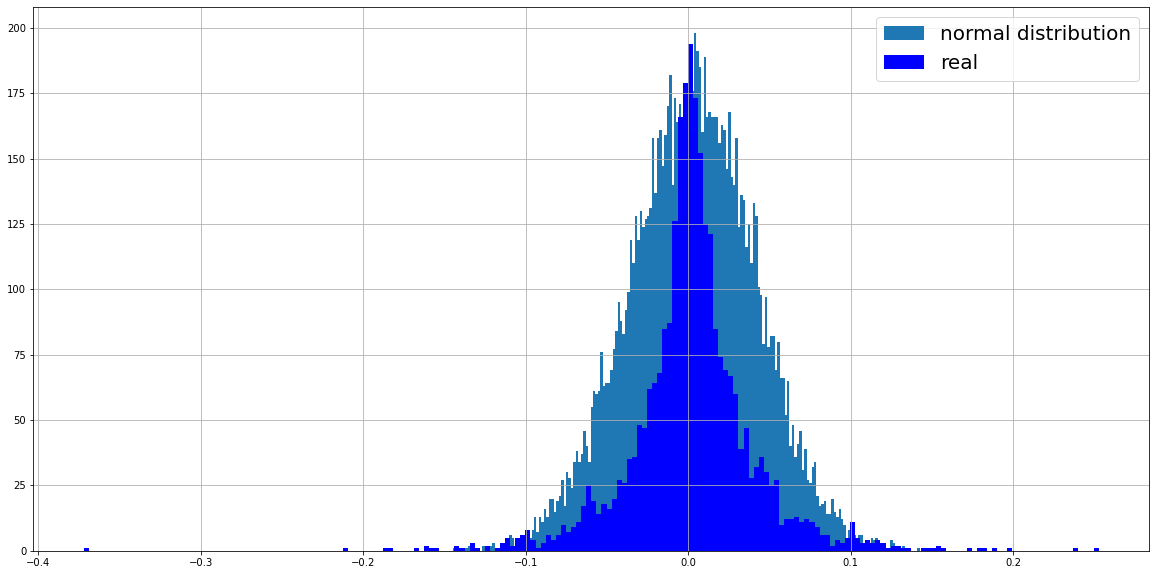

In [20]:
plt.figure(figsize=(20, 10))
plt.hist(np.random.normal(data['Close'].pct_change().mean(), data['Close'].pct_change().std(), 
                          size = data['Close'].__len__() * 4), bins = 200, alpha = 1, label = 'normal distribution')
data['Close'].pct_change().hist(bins = 200, alpha = 1, color = 'blue', label = 'real')
plt.legend(fontsize = 20)
plt.show()

- The kurtosis of the normal distribution seems to be greater than the kurtosis of the real data, but it can be confirmed that it follows the Gaussian distribution to some extent.

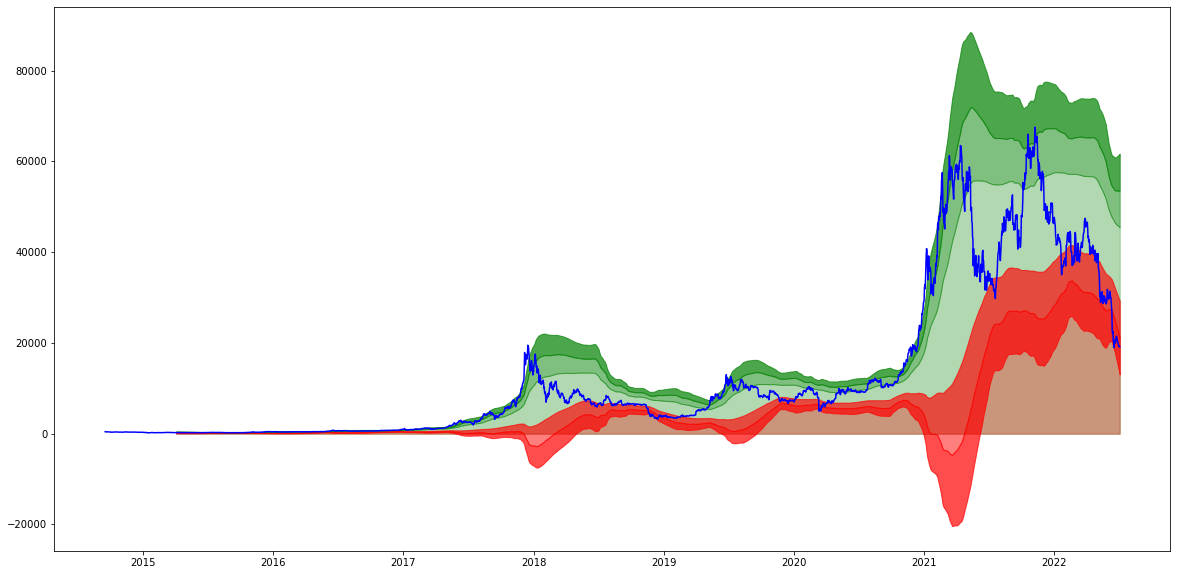

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(data['Close'], color = 'blue')
plt.fill_between(data['Close'].index, data['mean'] + data['std'], alpha = 0.3, color = 'green')
plt.fill_between(data['Close'].index, data['mean'] - data['std'], alpha = 0.3, color = 'red')

plt.fill_between(data['Close'].index, data['mean'] + data['std'], data['mean'] + data['std']*2, alpha = 0.5, color = 'green')
plt.fill_between(data['Close'].index, data['mean'] - data['std'], data['mean'] - data['std']*2, alpha = 0.5, color = 'red')

plt.fill_between(data['Close'].index, data['mean'] + data['std']*2, data['mean'] + data['std']*3, alpha = 0.7, color = 'green')
plt.fill_between(data['Close'].index, data['mean'] - data['std']*2, data['mean'] - data['std']*3, alpha = 0.7, color = 'red')
plt.show()

- Data beyond tow-sigma can be regarded as outliers, and they continue all the way, and the market price fluctuations are large in that interval.